In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import data

In [90]:
df = pd.read_csv('fraudTrain.csv')
df.set_index(df.columns[0], inplace=True)
df.index.name = None
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [91]:
# number of rows
print(df.shape[0])

1296675


In [92]:
# List all cols
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [93]:
# Number of unique cc_num
df['cc_num'].nunique()

983

In [94]:
# Ensure 'trans_date_trans_time' is in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

# Group by 'cc_num' and calculate the time difference
df['last_purchased'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

# For the first transaction for each 'cc_num', set 'last_purchased' to NaT
df['last_purchased'] = df['last_purchased'].fillna(pd.NaT)

# Display the DataFrame to verify the changes
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,last_purchased
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,NaT
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,0 days 19:57:42
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,0 days 00:02:39
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,0 days 03:50:38
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,0 days 00:32:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",personal_care,60.47,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,ad7dfdf0aaa36cd7985dd1f35ca0e2fc,1371762299,40.475395,-89.076105,0,0 days 08:32:20
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,gas_transport,74.29,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,6d427d735c9f9b2fd480f2c24b6525de,1371775261,40.743634,-89.553379,0,0 days 03:36:02
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",shopping_net,246.56,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,9814049bcc69fb31d81f4a907f2fe255,1371782879,40.215418,-88.682562,0,0 days 02:06:58
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,shopping_pos,2.62,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,ae39b91cd2b4897ddbbf6bf63d3e7b03,1371801868,40.762861,-88.744967,0,0 days 05:16:29


In [95]:
df.dtypes

trans_date_trans_time     datetime64[ns]
cc_num                             int64
merchant                          object
category                          object
amt                              float64
first                             object
last                              object
gender                            object
street                            object
city                              object
state                             object
zip                                int64
lat                              float64
long                             float64
city_pop                           int64
job                               object
dob                               object
trans_num                         object
unix_time                          int64
merch_lat                        float64
merch_long                       float64
is_fraud                           int64
last_purchased           timedelta64[ns]
dtype: object

In [96]:
import pandas as pd
import numpy as np

# Ensure 'trans_date_trans_time' is in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

# Group by 'cc_num' and calculate the time difference
df['last_purchased'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

# For the first transaction for each 'cc_num', set 'last_purchased' to NaT
df['last_purchased'] = df['last_purchased'].fillna(pd.NaT)

# Define the Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the distance to the last purchase
df['last_merch_lat'] = df.groupby('cc_num')['merch_lat'].shift()
df['last_merch_long'] = df.groupby('cc_num')['merch_long'].shift()

df['distance_last_purchase'] = haversine(df['merch_lat'], df['merch_long'], df['last_merch_lat'], df['last_merch_long'])

# For the first transaction for each 'cc_num', set 'distance_last_purchase' to NaN (this is in km)
df['distance_last_purchase'] = df['distance_last_purchase'].fillna(np.nan)

# Drop the temporary columns
df.drop(columns=['last_merch_lat', 'last_merch_long'], inplace=True)

# Display the DataFrame to verify the changes
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,last_purchased,distance_last_purchase
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,NaT,NaN
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,0 days 19:57:42,224.769219
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,0 days 00:02:39,105.220439
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,0 days 03:50:38,88.152283
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,0 days 00:32:32,132.876773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",personal_care,60.47,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,ad7dfdf0aaa36cd7985dd1f35ca0e2fc,1371762299,40.475395,-89.076105,0,0 days 08:32:20,72.133978
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,gas_transport,74.29,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,6d427d735c9f9b2fd480f2c24b6525de,1371775261,40.743634,-89.553379,0,0 days 03:36:02,50.128232
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",shopping_net,246.56,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,9814049bcc69fb31d81f4a907f2fe255,1371782879,40.215418,-88.682562,0,0 days 02:06:58,94.203913
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,shopping_pos,2.62,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,ae39b91cd2b4897ddbbf6bf63d3e7b03,1371801868,40.762861,-88.744967,0,0 days 05:16:29,61.101214


In [97]:
# Function to do all the preprocessing

def process_fraud_data(df):
    # Ensure 'trans_date_trans_time' is in datetime format
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

    # Get month of year, day of week, and hour of day for transactions
    df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
    df['trans_month'] = df['trans_date_trans_time'].dt.month_name()
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour

    # Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
    df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

    # Group by 'cc_num' and calculate the time difference
    df['last_purchased'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

    # For the first transaction for each 'cc_num', set 'last_purchased' to NaT
    df['last_purchased'] = df['last_purchased'].fillna(pd.NaT)

    # Convert 'last_purchased' to numerical format (e.g., total number of days and minutes)
    df['last_purchased_days'] = df['last_purchased'].dt.days
    df['last_purchased_mins'] = df['last_purchased'].dt.total_seconds() / 60

    # Define the Haversine distance function
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371  # Radius of the Earth in kilometers
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c

    # Calculate the distance to the last purchase
    df['last_merch_lat'] = df.groupby('cc_num')['merch_lat'].shift()
    df['last_merch_long'] = df.groupby('cc_num')['merch_long'].shift()

    df['distance_last_purchase'] = haversine(df['merch_lat'], df['merch_long'], df['last_merch_lat'], df['last_merch_long'])

    # For the first transaction for each 'cc_num', set 'distance_last_purchase' to NaN
    df['distance_last_purchase'] = df['distance_last_purchase'].fillna(np.nan)

    # Drop the temporary columns
    df.drop(columns=['last_merch_lat', 'last_merch_long'], inplace=True)

    # Sort the DataFrame by the original index to maintain the original order
    df.sort_index(inplace=True)

    return df

In [98]:
df_test = pd.read_csv('fraudTest.csv', index_col=0)
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [99]:
# Example usage:
processed_df_test = process_fraud_data(df_test)
processed_df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,trans_day_of_week,trans_month,trans_hour,last_purchased,last_purchased_days,last_purchased_mins,distance_last_purchase
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.986391,-81.200714,0,Sunday,June,12,NaT,NaN,NaN,NaN
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,39.450498,-109.960431,0,Sunday,June,12,NaT,NaN,NaN,NaN
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.495810,-74.196111,0,Sunday,June,12,NaT,NaN,NaN,NaN
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.812398,-80.883061,0,Sunday,June,12,NaT,NaN,NaN,NaN
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.959148,-85.884734,0,Sunday,June,12,NaT,NaN,NaN,NaN


In [100]:
df_train = pd.read_csv('fraudTrain.csv', index_col=0)
processed_df_train = process_fraud_data(df_train)
processed_df_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,trans_day_of_week,trans_month,trans_hour,last_purchased,last_purchased_days,last_purchased_mins,distance_last_purchase
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,Tuesday,January,0,NaT,NaN,NaN,NaN
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,Tuesday,January,0,NaT,NaN,NaN,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,Tuesday,January,0,NaT,NaN,NaN,NaN
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,Tuesday,January,0,NaT,NaN,NaN,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,Tuesday,January,0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,36.841266,-111.690765,0,Sunday,June,12,0 days 04:39:41,0.0,279.683333,112.032046
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,38.906881,-78.246528,0,Sunday,June,12,0 days 02:12:42,0.0,132.700000,94.988187
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,33.619513,-105.130529,0,Sunday,June,12,0 days 08:04:34,0.0,484.566667,177.104191
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,42.788940,-103.241160,0,Sunday,June,12,1 days 01:16:58,1.0,1516.966667,118.969517


## EDA

In [101]:
processed_df_train.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour,last_purchased,last_purchased_days,last_purchased_mins,distance_last_purchase
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1295692,1.295692e+06,1.295692e+06,1.295692e+06
mean,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,2012-10-03 05:53:56.726123008,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01,0 days 09:01:25.015289899,1.165246e-01,5.414169e+02,1.035944e+02
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,2012-01-01 00:00:18,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,0 days 00:00:00,0.000000e+00,0.000000e+00,8.069198e-02
25%,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,2012-06-03 19:12:22.500000,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00,0 days 01:40:13,0.000000e+00,1.002167e+02,6.438102e+01
50%,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,2012-10-03 07:35:47,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01,0 days 04:36:00,0.000000e+00,2.760000e+02,1.007818e+02
75%,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,2013-01-28 15:02:55.500000,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01,0 days 11:10:23,0.000000e+00,6.703833e+02,1.397061e+02
max,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2013-06-21 12:13:37,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,15 days 12:37:51,1.500000e+01,2.235785e+04,2.859922e+02
std,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00,0 days 13:10:00.977588903,4.603697e-01,7.900163e+02,5.039868e+01


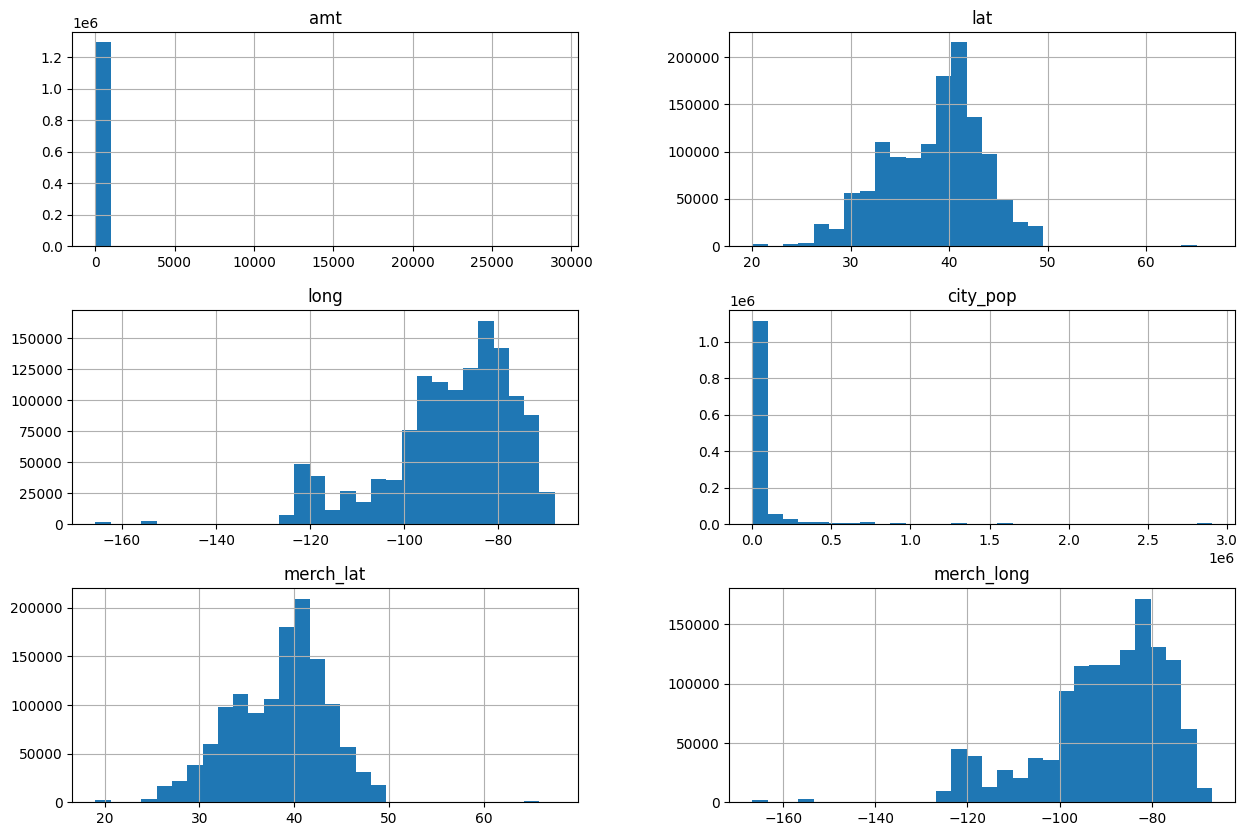

In [102]:
# Plot histograms for numerical columns
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
processed_df_train[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.show()

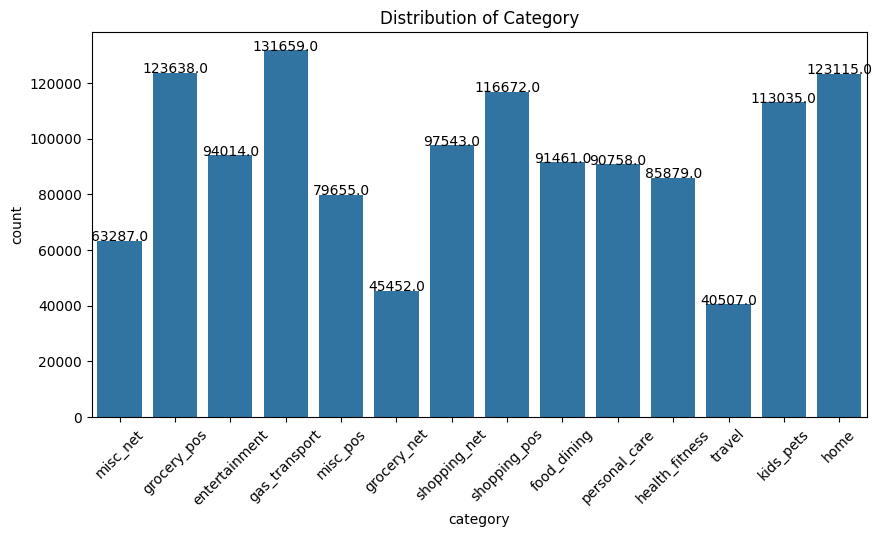

In [103]:
# Plot bar chart for 'category'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=processed_df_train, x='category')
plt.title('Distribution of Category')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

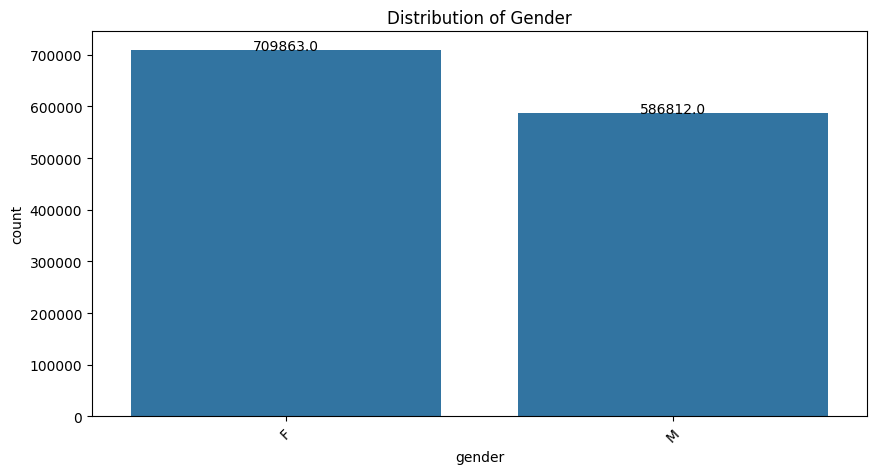

In [104]:
# Plot bar chart for 'gender'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=processed_df_train, x='gender')
plt.title('Distribution of Gender')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

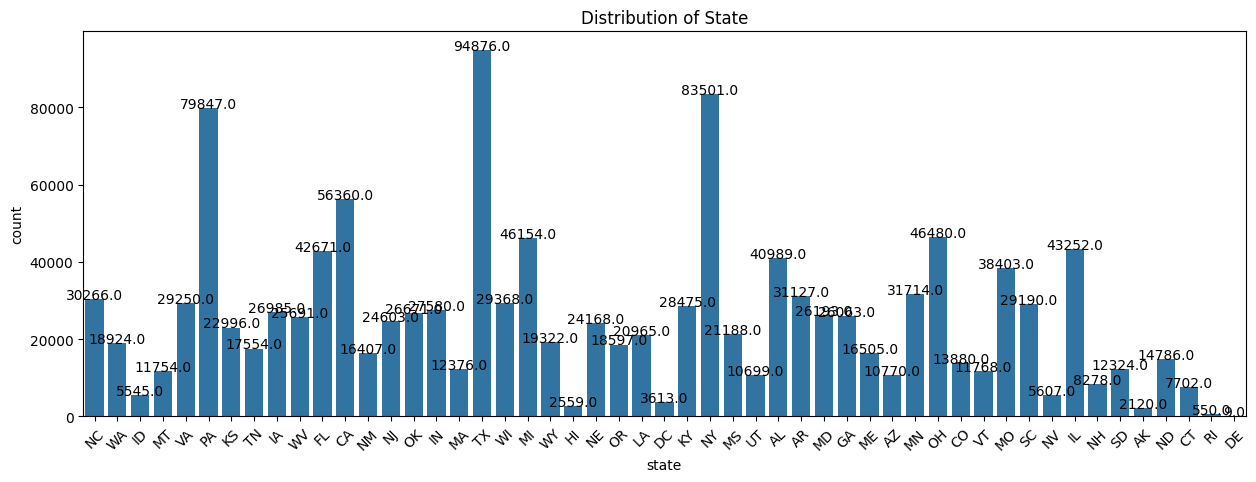

In [105]:
# Plot bar chart for 'state'
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=processed_df_train, x='state')
plt.title('Distribution of State')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

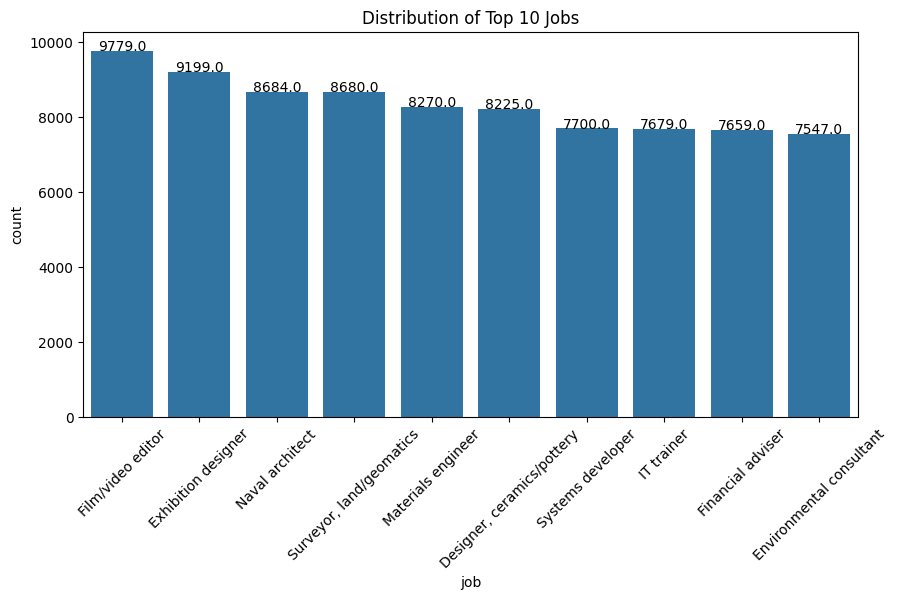

In [106]:
# Get the top 10 most frequent jobs
top_10_jobs = processed_df_train['job'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 20 jobs
filtered_df = processed_df_train[processed_df_train['job'].isin(top_10_jobs)]

# Plot bar chart for the top 20 jobs
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=filtered_df, x='job', order=top_10_jobs)
plt.title('Distribution of Top 10 Jobs')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

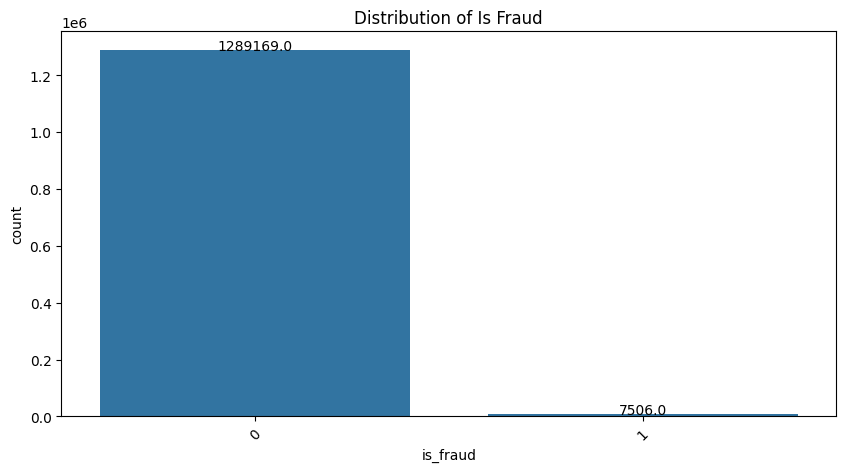

In [107]:
# Plot bar chart for 'is_fraud'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=processed_df_train, x='is_fraud')
plt.title('Distribution of Is Fraud')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

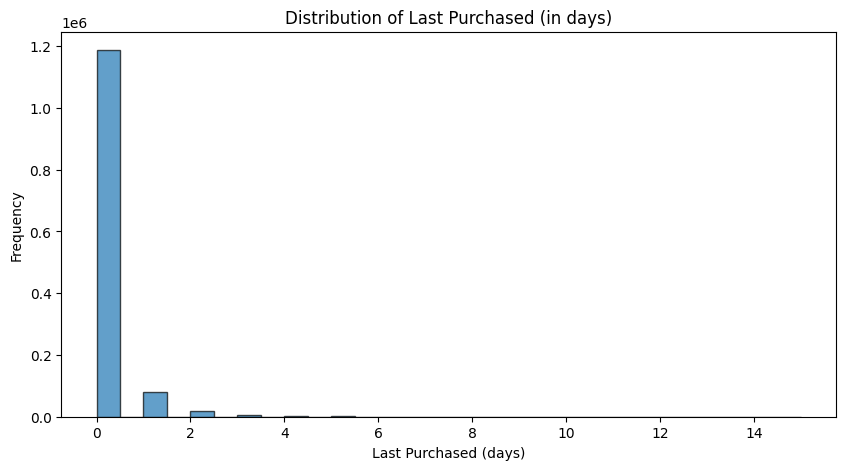

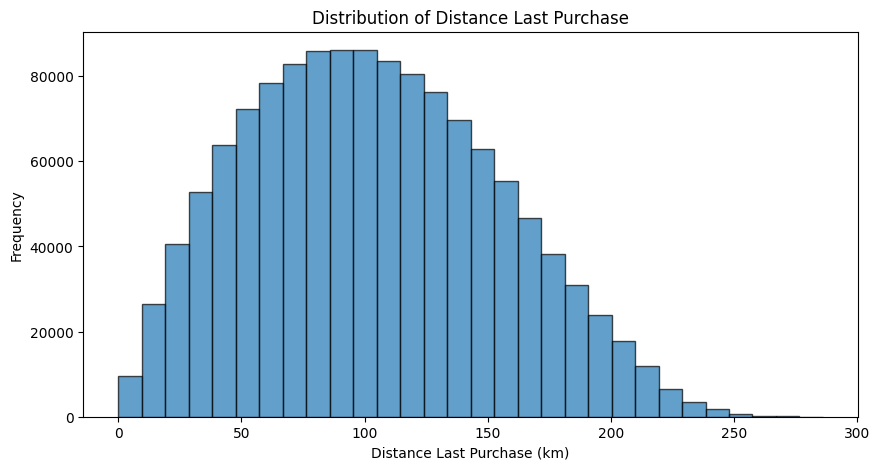

In [108]:
import matplotlib.pyplot as plt

# Plot histogram for 'last_purchased_days'
plt.figure(figsize=(10, 5))
plt.hist(processed_df_train['last_purchased_days'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Last Purchased (in days)')
plt.xlabel('Last Purchased (days)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'distance_last_purchase'
plt.figure(figsize=(10, 5))
plt.hist(processed_df_train['distance_last_purchase'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Distance Last Purchase')
plt.xlabel('Distance Last Purchase (km)')
plt.ylabel('Frequency')
plt.show()